# K-Means Clustering

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy

# sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Import Data

In [4]:
df_segmentation = pd.read_csv('../00_general_data/segmentation_data.csv', index_col=0)

In [5]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


# EDA (Exploratory Data Analysis)

In [6]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

In [8]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


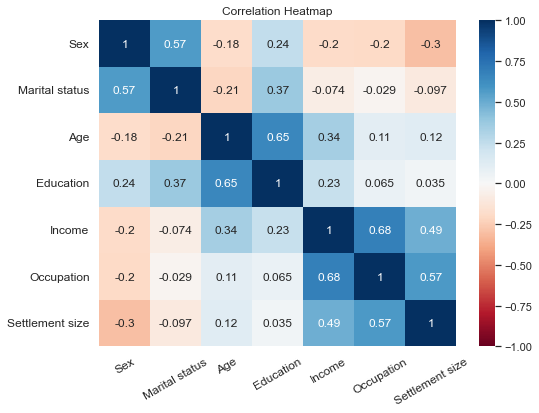

In [21]:
plt.figure(figsize=(8,6))

# set heatmap
s = sns.heatmap(data=df_segmentation.corr(),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)

# set yticklabels and xticklabels
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=30, fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

# Visualize Raw Data

In [26]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


Text(0.5, 1.0, 'Visualization of Raw Data')

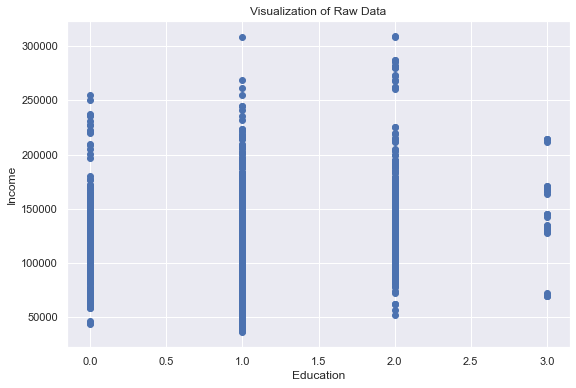

In [36]:
# visualize education and income
plt.figure(figsize=(9,6))
plt.scatter(x=df_segmentation.iloc[:,3],
           y=df_segmentation.iloc[:,4])
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

Text(0.5, 1.0, 'Visualization of raw data')

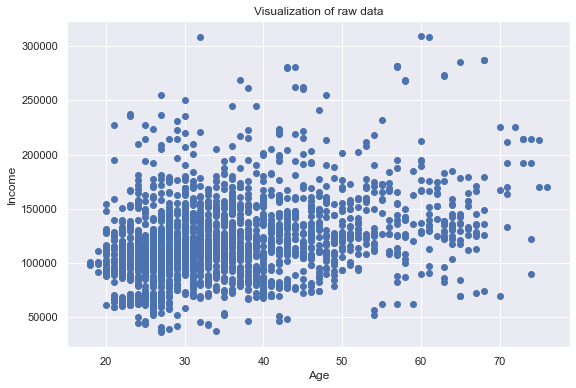

In [35]:
# visualize age and income
plt.figure(figsize = (9,6))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

# Standardization

In [39]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering

In [40]:
hier_clust = linkage(segmentation_std, method='ward')

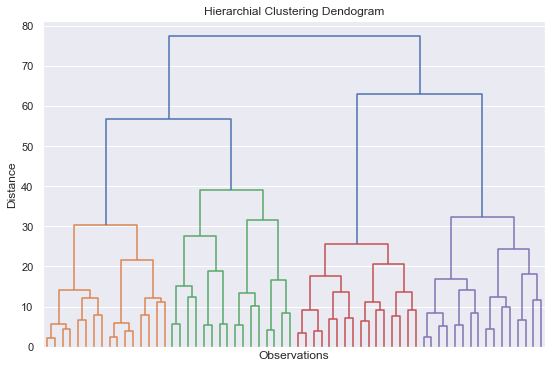

In [44]:
plt.figure(figsize=(9,6))
plt.title('Hierarchial Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)
plt.show()

# K-means Clustering

In [46]:
wcss = [] # this should be as minimum as possible
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

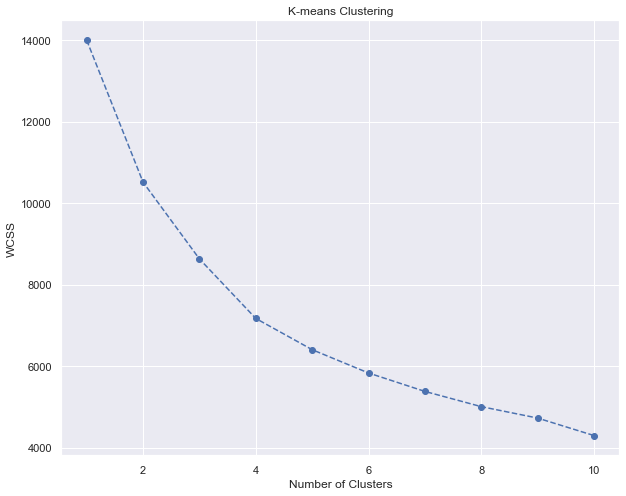

In [47]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [49]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)